In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

folder='/Users/gavin/Documents/Metis/Coursework/Project_3/'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [11]:
# import necessary libraries
import matplotlib.pyplot as plt
import scipy.stats as scs

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [12]:
df = pd.read_csv(folder+'/data_cleaning/mvp_grid_final.csv', )

In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
df.head()

,over_under_line,offensive_defensive_rank_diff,offensive_offensive_rank_dif,offense_defense_passing_completion,offense_rushing_vs_defense_rushing_allowed_yards,defense_offense_rank_dif,QB_rating,beat_spread,target_spread
0,51.0,8,2,-0.001416,0.964683,-5,101.9,0,-7.0
1,41.0,-8,-14,-0.055876,1.100013,1,76.3,0,-7.5
2,45.5,-15,-21,0.030268,0.909334,-16,94.5,0,-4.0
3,48.5,-18,-24,-0.102663,1.199853,-8,74.1,0,-1.0
4,41.5,2,-4,0.018954,1.233704,2,95.4,1,-3.5


In [15]:
y = df['beat_spread']
X = df.drop('beat_spread', axis=1)

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [16]:
ss = StandardScaler()
X_scale = ss.fit_transform(X)

In [17]:
lr = LogisticRegression(penalty='none')

lr.fit(X_scale, y)

y_preds = lr.predict(X_scale)

print(classification_report(y, y_preds))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       935
           1       0.58      0.53      0.55       853

    accuracy                           0.59      1788
   macro avg       0.59      0.59      0.59      1788
weighted avg       0.59      0.59      0.59      1788



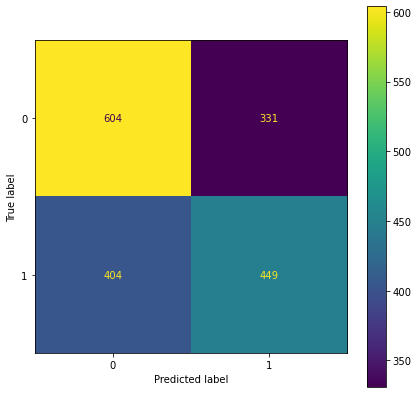

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(lr, X_scale, y, ax=ax);

# KNN Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean as euc
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
nn = KNeighborsRegressor(n_neighbors=1, n_jobs=-1)

nn.fit(X_scale, y)

sk_preds = nn.predict(X_scale)

rmse = np.sqrt(mean_squared_error(y, sk_preds))

print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 0.04


In [55]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
    
    nn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

    nn.fit(X_scale, y)
    test_preds = nn.predict(X_scale)
    
    test_errors[i] = np.sqrt(mean_squared_error(y, test_preds))

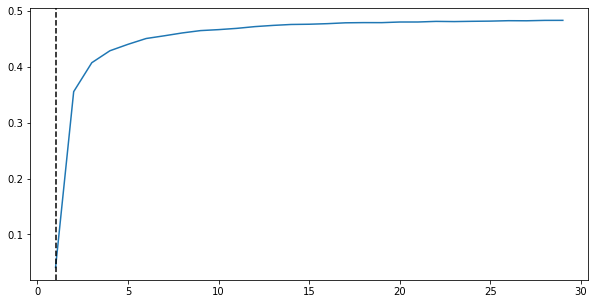

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle='--', color='black');

In [29]:
optimal_k = list(ks)[np.argmin(test_errors)]

optimal_error = np.min(test_errors)

print(f'Optimal number of Neighbors: {optimal_k}\nRoot Mean Squared Error: {optimal_error:.2f}')

Optimal number of Neighbors: 1
Root Mean Squared Error: 0.04


In [30]:
X_test_scaled = ss.fit_transform(X_test)

In [57]:
def plot_boundaries(model, X_test, X_train, ax, padding = 1, grid_granularity = 0.01, show_test=False, plot_probas=True):

    x_min, x_max = X_train['A'].min() - padding, X_train['A'].max() + padding
    y_min, y_max = X_train['B'].min() - padding, X_train['B'].max() + padding

    xs = np.arange(x_min, x_max, grid_granularity)
    ys = np.arange(y_min, y_max, grid_granularity)

    xx, yy = np.meshgrid(xs, ys)
    
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    if not plot_probas:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy , Z, cmap='PRGn', levels=20, alpha=.5)

    train_positives = X_train[X_train['target'] == 1]
    train_negatives = X_train[X_train['target'] == 0]

    ax.scatter(train_positives['A'], train_positives['B'], color='forestgreen', edgecolors='lightgreen')
    ax.scatter(train_negatives['A'], train_negatives['B'], color='purple', edgecolors='plum')

    if show_test:
        test_positives = X_test[X_test['target'] == 1]
        test_negatives = X_test[X_test['target'] == 0]

        ax.scatter(test_positives['A'], test_positives['B'], color='forestgreen', edgecolors='black')
        ax.scatter(test_negatives['A'], test_negatives['B'], color='purple', edgecolors='black')

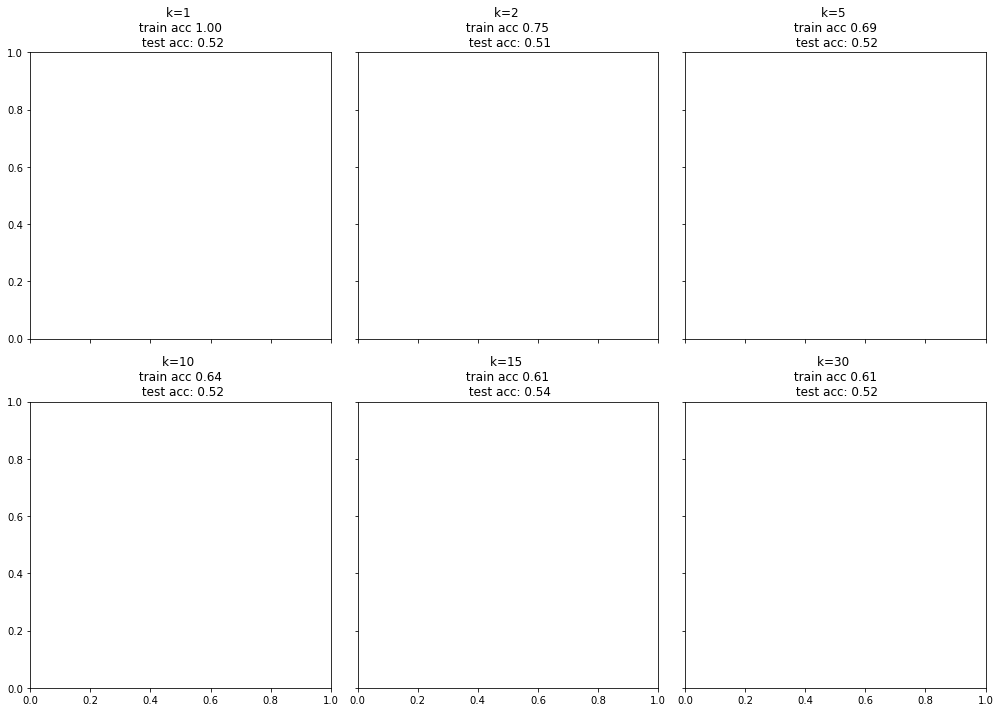

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10), sharey=True, sharex=True)

ks = [1, 2, 5, 10 , 15, 30]

for k, ax in zip(ks, axes.flatten()):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scale, y)
    
    train_preds = knn.score(X_scale, y)
    test_preds = knn.score(X_test_scaled, y_test)
    
    ax.set_title(f'k={knn.n_neighbors} \n train acc {train_preds:.2f} \n test acc: {test_preds:.2f}')
    
fig.tight_layout()

# Tree Based Models

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [40]:
y_all = df['beat_spread']
X_all = df.drop('beat_spread', axis=1)

In [64]:
decisiontree = DecisionTreeClassifier(max_depth=4)
linearsvc = LinearSVC()

In [60]:
quick_test_afew_times(linearsvc, X_all, y_all)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

0.5102372034956304

In [67]:
quick_test_afew_times(decisiontree, X_all, y_all, )

0.5353308364544319

In [47]:
df

,over_under_line,offensive_defensive_rank_diff,offensive_offensive_rank_dif,offense_defense_passing_completion,offense_rushing_vs_defense_rushing_allowed_yards,defense_offense_rank_dif,QB_rating,beat_spread,target_spread
0,51.0,8,2,-0.001416,0.964683,-5,101.9,0,-7.0
1,41.0,-8,-14,-0.055876,1.100013,1,76.3,0,-7.5
2,45.5,-15,-21,0.030268,0.909334,-16,94.5,0,-4.0
3,48.5,-18,-24,-0.102663,1.199853,-8,74.1,0,-1.0
4,41.5,2,-4,0.018954,1.233704,2,95.4,1,-3.5


In [49]:
df.to_csv('/Users/gavin/Documents/Metis/Coursework/Project_3/data_cleaning/feature_engineering.csv')